In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/visualization/ST001937/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../data/archive/ST001937_AN003150.csv')
df.describe()

,"1,3,5(10)-estratrien-3,6- beta-17-beta-triol","1,5-anhydroglucitol",17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-1,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-2,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-3,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-4,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-5,17-alpha-20-alpha-dihydroxy-4-pregnen-3-one-6,1-hexadecanol,1-hydroxyanthraquinone prod,...,tyrosine-1,tyrosine-2,urea-1,urea-2,urea-3,urea-4,uridine,valine,xanthine,xanthosine
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,...,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,0.599630,0.774020,1.009531,0.707177,1.011344,0.765055,0.982467,0.937548,0.984109,0.837244,...,0.992181,0.989690,0.985817,0.989259,0.992462,1.091930,1.875119,1.039777,1.110534,0.866441
std,9.635550,1.617866,0.793847,1.997569,1.202871,11.505935,0.919342,0.871627,0.504116,0.702744,...,0.764778,0.619258,0.611037,0.729933,0.562180,3.380549,16.396033,3.577378,3.435902,2.507006
min,-186.491942,-15.302208,0.028745,-19.843612,0.020405,-215.131930,0.000001,0.019746,0.029220,0.002040,...,0.058795,0.010670,0.000000,0.000000,0.000102,0.014105,-22.231170,-23.009451,0.009951,-51.752660
25%,0.050202,0.470990,0.609089,0.031634,0.134342,0.441910,0.498016,0.489552,0.788629,0.472040,...,0.695027,0.699527,0.669614,0.531391,0.685202,0.091561,0.016818,0.174338,0.291578,0.115695
50%,0.153529,0.723323,0.852075,0.228074,0.795301,0.848926,0.825881,0.768247,0.940265,0.662749,...,0.873522,0.930934,0.920929,0.902885,0.926336,0.156378,0.112790,0.359630,0.571841,0.473558
75%,0.541650,0.992162,1.201672,0.765776,1.528280,1.300731,1.226635,1.160079,1.080494,1.014856,...,1.104474,1.217377,1.217065,1.341768,1.193851,0.340881,0.464196,0.841951,1.059627,1.317388
max,126.860070,40.665768,11.641053,24.195725,15.805307,239.561563,19.882009,13.956629,8.076066,7.080404,...,16.206260,11.647518,10.149729,13.078118,10.244206,48.041776,428.787832,63.207003,84.958222,30.639259


1

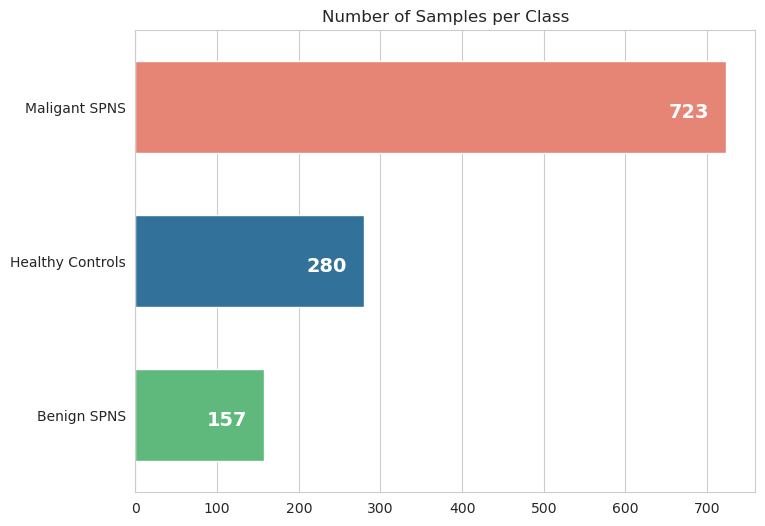

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df.Phenotypes, data=df, width=0.6, order=df.Phenotypes.value_counts().index, 
              palette=[palette[1], palette[0], palette[3]])
plt.xlabel("")

#printing total number of classes over the bar
for index, value in enumerate(df.Phenotypes.value_counts()):
    plt.text(value - 70, index + 0.07, str(value), color='white', fontweight='bold', fontsize=14)
plt.title("Number of Samples per Class")
plt.ylabel('')
plt.savefig(output_directory + "ST001937_count_of_each_target_class.png", bbox_inches='tight')

Volcano plot Health vs General SPNS

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_metabolites = df.drop(columns=['Sample ID', 'Phenotypes', 'RAW_FILE_NAME'])
df_metabolites['Phenotypes'] = df.applymap(lambda x: 0 if x == 'Healthy Controls' else 1)['Phenotypes']

# Calcola il fold change
fold_change = np.log2(df_metabolites.loc[df_metabolites['Phenotypes'] == 1].mean() / df_metabolites.loc[
    df_metabolites['Phenotypes'] == 0].mean())


# Calcola il p-value
t_stat, p_value = stats.ttest_ind(df_metabolites.loc[df_metabolites['Phenotypes'] == 0],
                                  df_metabolites.loc[df_metabolites['Phenotypes'] == 1])
# Calcola -log10(p_value)
log_p_value = -np.log10(p_value)

# Crea il DataFrame per il volcano plot
df_volcano = pd.DataFrame({'fold_change': fold_change, '-log10(p_value)': log_p_value})

/home/marco/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_39416/2381387359.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(df_metabolites.loc[df_metabolites['Phenotypes'] == 0],
/tmp/ipykernel_39416/2381387359.py:19: RuntimeWarning: divide by zero encountered in log10
  log_p_value = -np.log10(p_value)


,fold_change,-log10(p_value)
Phenotypes,inf,inf
tryptophan-3,-6.725314,23.284997
"4',5-dihydroxy-7-methoxyisoflavone-1",-0.742785,21.020003
glutathione-2,0.819898,18.179245
piceatannol-2,NaN,18.022679
...,...,...
melezitose,-0.189503,1.350078
chlorogenic acid-1,-1.551126,1.337962
halostachine,-0.132722,1.329808
thymidine,-0.134338,1.307791


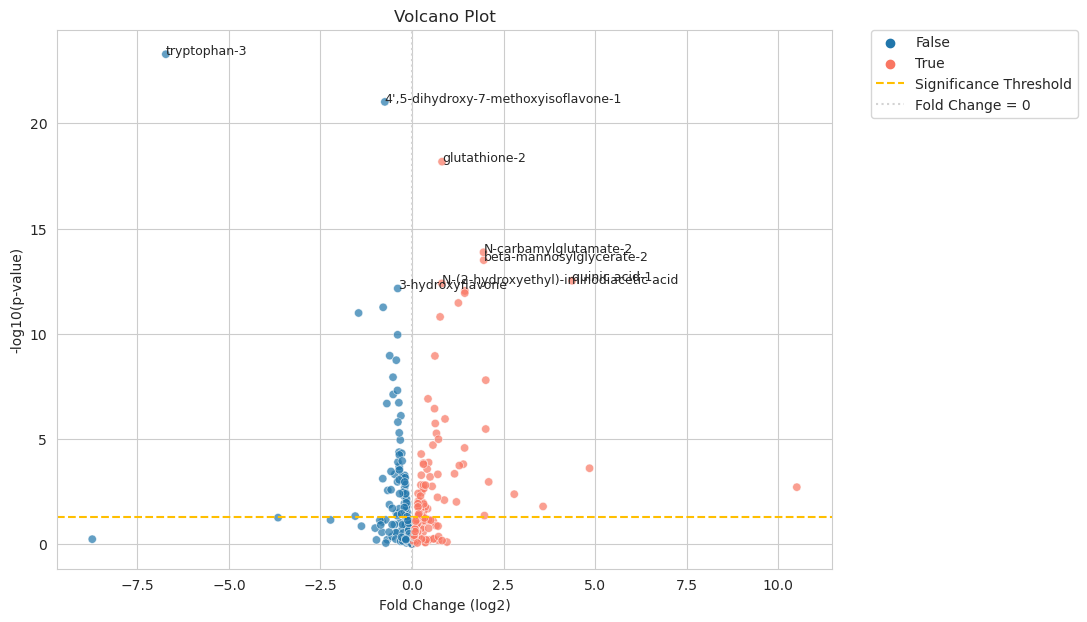

In [14]:
# Crea il volcano plot
plt.figure(figsize=(10, 7))

#scatter plot with fold change on x-axis and -log10(p-value) on y-axis hue = fold change positive or negative
sns.scatterplot(x='fold_change', y='-log10(p_value)', data=df_volcano, hue=df_volcano['fold_change'] > 0,
                palette=palette[:2], alpha=0.7)
plt.xlabel('Fold Change (log2)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.axhline(y=-np.log10(0.05), linestyle='--', label='Significance Threshold', color=palette[2])
plt.axvline(x=0, linestyle=':', label='Fold Change = 0', color="lightgrey")

# Marking top metabolites by fold change and -log10(p-value) filter = df_volcano['-log10(p_value)'] > -np.log10(0.05)
top_metabolites = df_volcano.sort_values(by=['-log10(p_value)', 'fold_change'], ascending=False)
top_metabolites = top_metabolites.loc[top_metabolites['-log10(p_value)'] > -np.log10(0.05)]
for index, row in top_metabolites.head(10).iterrows():
    plt.annotate(index, (row['fold_change'], row['-log10(p_value)']), fontsize=9)

#legend out of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(output_directory + "volcano_plot_Health_vs_General_SPNS.png", bbox_inches='tight')

top_metabolites

<Figure size 800x600 with 0 Axes>

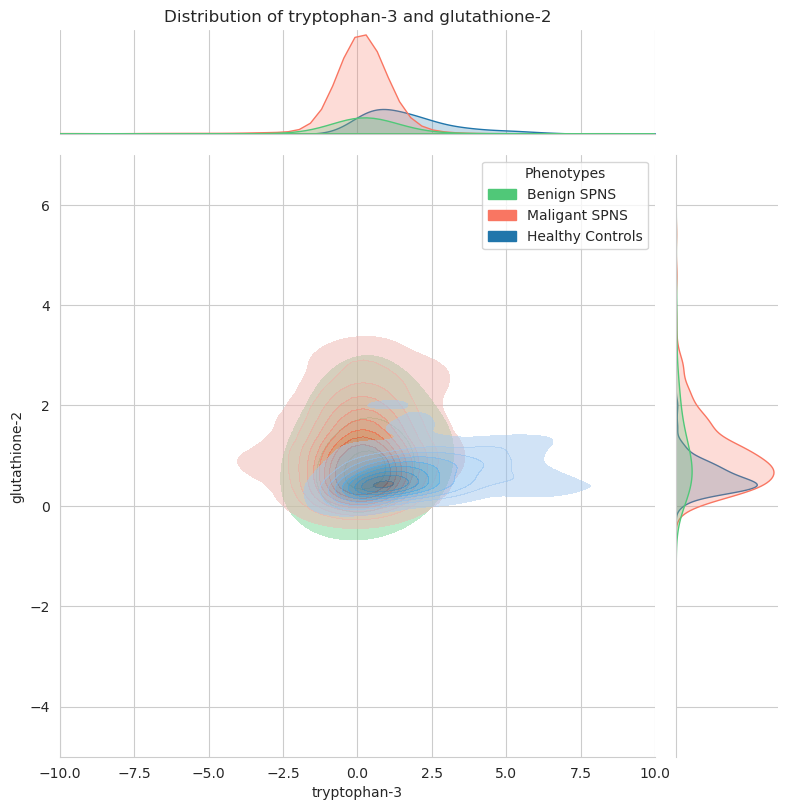

In [15]:
x = "tryptophan-3"
y = "glutathione-2"
z = "Phenotypes"

# Set the style before creating the plot
plt.figure(figsize=(8, 6))
# Create the jointplot with the correct order of arguments
plot = sns.jointplot(x=x, y=y, data=df, hue=z, alpha=.5, height=8, palette=[palette[3], palette[1], palette[0]],
                     kind='kde', fill=True)
# Set labels and legend after creating the plot
plot.set_axis_labels(xlabel=x, ylabel=y)

# Set the title after creating the plot
plt.xlim(-10, 10)
plt.ylim(-5, 7)
plot.ax_marg_x.set_title("Distribution of {} and {}".format(x, y))
plt.savefig(output_directory + "jointplot_{}_{}_kde.png".format(x, y), bbox_inches='tight')

Volcano plot Benign SPNS vs Malignant SPNS

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_metabolites = df.drop(columns=['Sample ID', 'RAW_FILE_NAME'])
#droping  phenotypes with Healthy Controls
df_metabolites = df_metabolites[df_metabolites['Phenotypes'] != 'Healthy Controls']

df_metabolites['Phenotypes'] = df.applymap(lambda x: 0 if x == 'Benign SPNS' else 1)['Phenotypes']

# Calcola il fold change
fold_change = np.log2(df_metabolites.loc[df_metabolites['Phenotypes'] == 1].mean() / df_metabolites.loc[
    df_metabolites['Phenotypes'] == 0].mean())


# Calcola il p-value
t_stat, p_value = stats.ttest_ind(df_metabolites.loc[df_metabolites['Phenotypes'] == 0],
                                  df_metabolites.loc[df_metabolites['Phenotypes'] == 1])
# Calcola -log10(p_value)
log_p_value = -np.log10(p_value)

# Crea il DataFrame per il volcano plot
df_volcano = pd.DataFrame({'fold_change': fold_change, '-log10(p_value)': log_p_value})

/home/marco/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_39416/2010747862.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(df_metabolites.loc[df_metabolites['Phenotypes'] == 0],
/tmp/ipykernel_39416/2010747862.py:22: RuntimeWarning: divide by zero encountered in log10
  log_p_value = -np.log10(p_value)


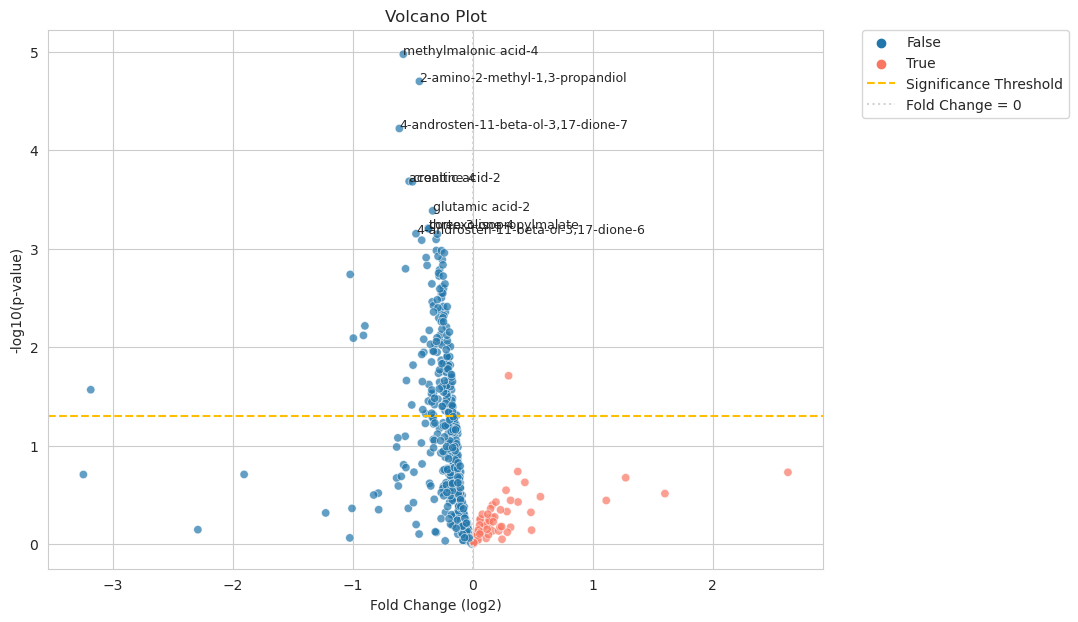

,fold_change,-log10(p_value)
Phenotypes,inf,inf
methylmalonic acid-4,-0.576982,4.974672
"2-amino-2-methyl-1,3-propandiol",-0.442696,4.699389
"4-androsten-11-beta-ol-3,17-dione-7",-0.609875,4.220925
aconitic acid-2,-0.528298,3.684735
...,...,...
pentadecanoic acid-1,-0.339991,1.330214
glutathione-2,-0.189045,1.329968
adipamide-5,-0.389332,1.324169
allo-inositol-1,-0.325800,1.312914


In [17]:
# Crea il volcano plot
plt.figure(figsize=(10, 7))

#scatter plot with fold change on x-axis and -log10(p-value) on y-axis hue = fold change positive or negative
sns.scatterplot(x='fold_change', y='-log10(p_value)', data=df_volcano, hue=df_volcano['fold_change'] > 0,
                palette=palette[:2], alpha=0.7)
plt.xlabel('Fold Change (log2)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.axhline(y=-np.log10(0.05), linestyle='--', label='Significance Threshold', color=palette[2])
plt.axvline(x=0, linestyle=':', label='Fold Change = 0', color="lightgrey")

# Marking top metabolites by fold change and -log10(p-value) filter = df_volcano['-log10(p_value)'] > -np.log10(0.05)
top_metabolites = df_volcano.sort_values(by=['-log10(p_value)', 'fold_change'], ascending=False)
top_metabolites = top_metabolites.loc[top_metabolites['-log10(p_value)'] > -np.log10(0.05)]
for index, row in top_metabolites.head(10).iterrows():
    plt.annotate(index, (row['fold_change'], row['-log10(p_value)']), fontsize=9)

#legend out of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

top_metabolites

<Figure size 800x600 with 0 Axes>

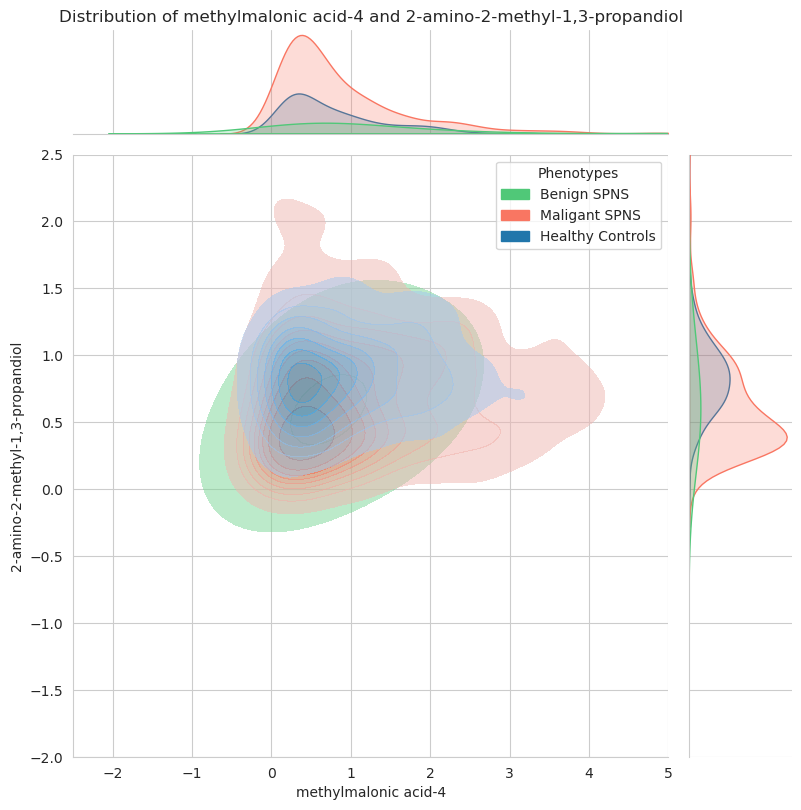

In [18]:
x = "methylmalonic acid-4"
y = "2-amino-2-methyl-1,3-propandiol"
z = "Phenotypes"

# Set the style before creating the plot
plt.figure(figsize=(8, 6))
# Create the jointplot with the correct order of arguments
plot = sns.jointplot(x=x, y=y, data=df, hue=z, alpha=.5, height=8, palette=[palette[3], palette[1], palette[0]],
                     kind='kde', fill=True)
# Set labels and legend after creating the plot
plot.set_axis_labels(xlabel=x, ylabel=y)

# Set the title after creating the plot
plt.xlim(-2.5, 5)
plt.ylim(-2, 2.5)
plot.ax_marg_x.set_title("Distribution of {} and {}".format(x, y))
plt.savefig(output_directory + "jointplot_{}_{}_kde.png".format(x, y), bbox_inches='tight')